WeatherPy Homework - Week 6
Observations:
1. A cloudy zone is found over the equator. This is due to warm air that rise and condenses creating clouds and storms. See plot.
2. Temperatures are higher closer to the equator.
3. Higher wind speeds in the Northern Hemisphere.

In [42]:
import pandas as pd
import numpy as np
import os
os.getcwd()
import glob
import requests
import json
import matplotlib.pyplot as plt

import openweathermapy.core as owm


from config import api_key

glob.glob('*csv')

['simplemaps-worldcities-basic.csv']

In [43]:
file = "simplemaps-worldcities-basic.csv"
city_df = pd.read_csv(file)

In [44]:
df = city_df[city_df['pop']>750000]
print(df.shape)
df.head()

(577, 9)


,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
30,Kabul,Kabul,34.516690,69.183260,3160266.0,Afghanistan,AF,AFG,Kabul
100,Algiers,Algiers,36.763065,3.050553,2665831.5,Algeria,DZ,DZA,Alger
129,Huambo,Huambo,-12.749985,15.760009,986000.0,Angola,AO,AGO,Huambo
130,Luanda,Luanda,-8.838286,13.234427,3562086.0,Angola,AO,AGO,Luanda
230,Rosario,Rosario,-32.951130,-60.666308,1094784.5,Argentina,AR,ARG,Santa Fe


In [4]:
def get_current_weather(df_object):
    
    try:
        base_url = "http://api.openweathermap.org/data/2.5/weather"
        params = {
        'APPID': api_key,
        'lat': df_object.lat,
        'lon': df_object.lng,
        'units': 'Imperial'
        }
        data = requests.get(base_url, params=params)
        #return (data.url)
        return data.json()
    except: 
        pass

In [5]:
sample = df.sample(n=500)
sample['weather_json'] = sample.apply(get_current_weather, axis=1)
sample['temp'] = sample.weather_json.map(lambda x: x.get('main').get('temp'))
sample['clouds'] = sample.weather_json.map(lambda x: x.get('clouds').get('all'))
sample['humidity'] = sample.weather_json.map(lambda x: x.get('main').get('humidity'))
sample['wind'] = sample.weather_json.map(lambda x: x.get('wind').get('speed'))
sample.head()

,city,city_ascii,lat,lng,pop,country,iso2,iso3,province,weather_json,temp,clouds,humidity,wind
5705,San Francisco,San Francisco,37.740008,-122.459978,2091036.0,United States of America,US,USA,California,"{'coord': {'lon': -122.46, 'lat': 37.74}, 'wea...",75.51,20,60,9.17
3528,Lagos,Lagos,6.443262,3.391531,4733768.0,Nigeria,NG,NGA,Lagos,"{'coord': {'lon': 3.39, 'lat': 6.44}, 'weather...",80.60,40,78,2.24
555,Duque de Caxias,Duque de Caxias,-22.769994,-43.309977,842890.0,Brazil,BR,BRA,Rio de Janeiro,"{'coord': {'lon': -43.31, 'lat': -22.77}, 'wea...",88.05,0,38,5.82
5813,Valencia,Valencia,10.229982,-67.980021,1569526.5,Venezuela,VE,VEN,Carabobo,"{'coord': {'lon': -67.98, 'lat': 10.23}, 'weat...",89.60,40,43,2.24
1351,Luoyang,Luoyang,34.679988,112.470075,1552790.5,China,CN,CHN,Henan,"{'coord': {'lon': 112.47, 'lat': 34.68}, 'weat...",78.94,80,81,4.59


In [9]:
temp_lat = sample.copy()

In [10]:
temp_lat.drop(temp_lat.columns[[1,5,6,7,8,9]], axis=1, inplace=True)

In [47]:
temp_lat


,city,lat,lng,pop,temp,clouds,humidity,wind
5705,San Francisco,37.740008,-122.459978,2091036.0,75.51,20,60,9.17
3528,Lagos,6.443262,3.391531,4733768.0,80.60,40,78,2.24
555,Duque de Caxias,-22.769994,-43.309977,842890.0,88.05,0,38,5.82
5813,Valencia,10.229982,-67.980021,1569526.5,89.60,40,43,2.24
1351,Luoyang,34.679988,112.470075,1552790.5,78.94,80,81,4.59
1402,Nanchong,30.780433,106.129997,2174000.0,75.07,92,96,2.80
1473,Nanning,22.819988,108.320044,1485394.0,78.80,40,94,4.47
1461,Huainan,32.629984,116.979981,1239327.5,78.76,20,87,7.49
1759,Santo Domingo,18.470073,-69.900085,1078436.5,79.77,90,83,5.82
2409,Ahmedabad,23.030053,72.580004,4547355.0,86.00,40,74,5.82


In [48]:
temp_lat.to_csv('weatherpy.csv')

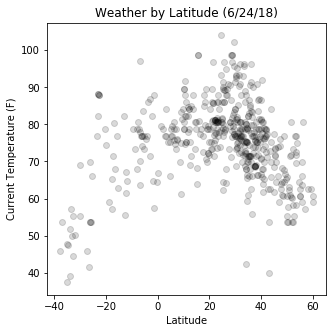

In [49]:
fig, ax = plt.subplots()

ax.scatter(x='lat', y='temp', data=temp_lat, c='k', alpha=.15)

plt.xlabel("Latitude")
plt.ylabel("Current Temperature (F)")
plt.title("Weather by Latitude (6/24/18)")
fig.set_size_inches(5, 5, forward=True)

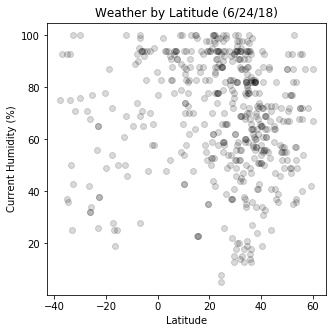

In [50]:
fig, ax = plt.subplots()

ax.scatter(x='lat', y='humidity', data=temp_lat, c='k', alpha=.15)

plt.xlabel("Latitude")
plt.ylabel("Current Humidity (%)")
plt.title("Weather by Latitude (6/24/18)")
fig.set_size_inches(5, 5, forward=True)

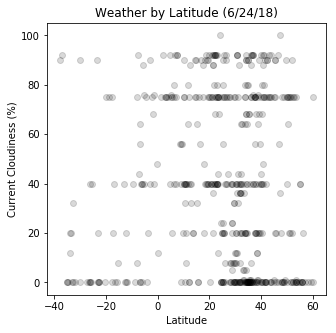

In [51]:
fig, ax = plt.subplots()

ax.scatter(x='lat', y='clouds', data=temp_lat, c='k', alpha=.15)

plt.xlabel("Latitude")
plt.ylabel("Current Cloudiness (%)")
plt.title("Weather by Latitude (6/24/18)")
fig.set_size_inches(5, 5, forward=True)

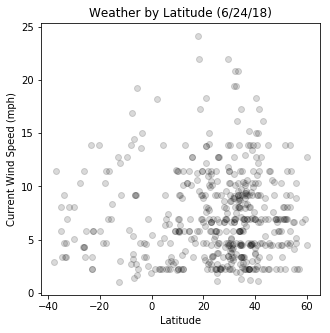

In [52]:
fig, ax = plt.subplots()

ax.scatter(x='lat', y='wind', data=temp_lat, c='k', alpha=.15)

plt.xlabel("Latitude")
plt.ylabel("Current Wind Speed (mph)")
plt.title("Weather by Latitude (6/24/18)")
fig.set_size_inches(5, 5, forward=True)